In [1]:
from transformers import BeitImageProcessor, BeitForImageClassification
from PIL import Image

processor = BeitImageProcessor.from_pretrained('TimKond/diffusion-detection')
model = BeitForImageClassification.from_pretrained('TimKond/diffusion-detection')

image = Image.open("2980_saltshaker.jpg")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: positive


In [100]:
from transformers import BeitImageProcessor, BeitForImageClassification, BeitForMaskedImageModeling
from PIL import Image
import requests

# "rescale_factor": 0.00392156862745098,

processor = BeitImageProcessor.from_pretrained('BEiT-diff-detect')
#model = BeitImageProcessor.from_pretrained('microsoft/beit-base-patch16-224-pt22k')
model = BeitForImageClassification.from_pretrained('BEiT-diff-detect')

model_pre = BeitForMaskedImageModeling.from_pretrained('microsoft/beit-base-patch16-224-pt22k')

In [101]:
mod_pre = model_pre.modules() # pre trained model last layers
*_, seven, six, fifh, fourth, third, second, last = mod_pre
print(seven)
print(six)
print(fifh)
print(fourth)
print(third)
print(second)
print(last)

Dropout(p=0.0, inplace=False)
LayerNorm((768,), eps=1e-12, elementwise_affine=True)
BeitDropPath(p=0.10000000149011612)
LayerNorm((768,), eps=1e-12, elementwise_affine=True)
Identity()
LayerNorm((768,), eps=1e-12, elementwise_affine=True)
Linear(in_features=768, out_features=8192, bias=True)


In [102]:
mod = model.modules() # trained model last layers
*_, seven, six, fifh, fourth, third, second, last = mod
print(seven)
print(six)
print(fifh)
print(fourth)
print(third)
print(second)
print(last)

LayerNorm((768,), eps=1e-12, elementwise_affine=True)
BeitDropPath(p=0.10000000149011612)
LayerNorm((768,), eps=1e-12, elementwise_affine=True)
Identity()
BeitPooler(
  (layernorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
)
LayerNorm((768,), eps=1e-12, elementwise_affine=True)
Linear(in_features=768, out_features=2, bias=True)


In [3]:
from PIL import Image
  
# open method used to open different extension image file
image = Image.open("2980_saltshaker_edit.jpg") 
#image = Image.open("apple_attention_test.png") 
image = image.convert('RGB')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 21,841 ImageNet-22k classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: positive


In [4]:
outputs

ImageClassifierOutput(loss=None, logits=tensor([[-3.0686,  2.3011]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [5]:
inputs["pixel_values"][0].shape

torch.Size([3, 224, 224])

In [6]:
inputs["pixel_values"][0].T

C:\Users\Tim\AppData\Local\Temp/ipykernel_7780/1063788002.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2318.)
  inputs["pixel_values"][0].T


tensor([[[-0.0980, -0.0745, -0.0353],
         [-0.0980, -0.0745, -0.0353],
         [-0.0980, -0.0745, -0.0353],
         ...,
         [ 0.1294,  0.1686,  0.2000],
         [ 0.1216,  0.1608,  0.1922],
         [ 0.1529,  0.1922,  0.2235]],

        [[-0.0902, -0.0667, -0.0275],
         [-0.0902, -0.0667, -0.0275],
         [-0.0902, -0.0667, -0.0275],
         ...,
         [ 0.1451,  0.1843,  0.2157],
         [ 0.1216,  0.1608,  0.1922],
         [ 0.1451,  0.1843,  0.2157]],

        [[-0.0824, -0.0588, -0.0196],
         [-0.0824, -0.0588, -0.0196],
         [-0.0824, -0.0588, -0.0196],
         ...,
         [ 0.1294,  0.1686,  0.2000],
         [ 0.1294,  0.1686,  0.2000],
         [ 0.1294,  0.1686,  0.2000]],

        ...,

        [[ 0.2314,  0.2549,  0.2941],
         [ 0.2314,  0.2549,  0.2941],
         [ 0.2314,  0.2549,  0.2941],
         ...,
         [ 0.3098,  0.3333,  0.3725],
         [ 0.2863,  0.3098,  0.3490],
         [ 0.2941,  0.3176,  0.3569]],

        [[

In [7]:
import torch

inputs["pixel_values"].requires_grad = True
inputs["labels"] = torch.tensor(0)

out = model.forward(**inputs)
out.loss.backward()
grads = inputs["pixel_values"].grad[0]

In [8]:
type(inputs["pixel_values"])

torch.Tensor

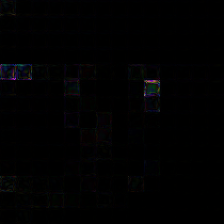

In [9]:
from PIL import Image
import numpy as np
import torch

# define a function to display an array as a image
def array_to_img(arr):
    imgdata = arr.tolist()
    transpose = np.transpose(np.array(imgdata), (1,2,0))
    absolute = np.absolute(transpose)
    #avg_abs = np.average(imgdata,axis=2)
    normalized =  absolute * (255.0/absolute.max())
    integ = normalized.astype(np.uint8)

    img = Image.fromarray(integ, 'RGB')
    return img

array_to_img(grads)

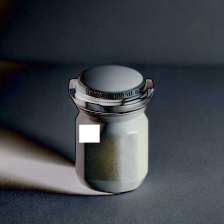

In [10]:
array_to_img(inputs["pixel_values"][0])

In [11]:
def preprocess_image(img):
    width, height = img.size
    target_size = min(width, height)
    left = max(0, (width - target_size ) // 2)
    right = left + target_size
    top = max(0, (height - target_size ) // 2)
    bottom = top + target_size
    crop = img.crop((left, top, right, bottom)).convert('RGB')
    resize = crop.resize((224,224))
    return resize

logits:  tensor([[ 0.4017, -1.5293]], grad_fn=<AddmmBackward0>)
Predicted class: negative


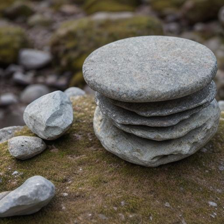

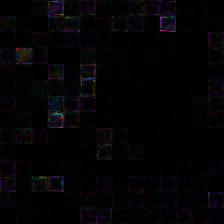

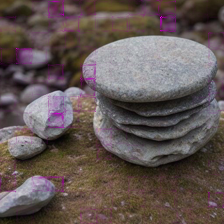

In [12]:
def analyse_image(path=None, img=None):
    if path is not None:
        image = Image.open(path)    
    elif img is not None:
        image = img 
    image = image.convert('RGB')
    image = preprocess_image(image)
    inputs = processor(images=image, return_tensors="pt")

    outputs = model(**inputs)
    logits = outputs.logits
    print("logits: ", outputs.logits)
    # model predicts one of the 21,841 ImageNet-22k classes
    predicted_class_idx = logits.argmax(-1).item()
    print("Predicted class:", model.config.id2label[predicted_class_idx])

    inputs["pixel_values"].requires_grad = True
    inputs["labels"] = torch.tensor(0)

    out = model.forward(**inputs)
    out.loss.backward() # this propagates the loss backwards to get the gradients of the pixels at the input layer
    grads = inputs["pixel_values"].grad[0]

    display(image)
    #display(array_to_img(inputs["pixel_values"][0]))
    display(array_to_img(grads))

    color_matrix = np.array(  224*[224*[[255.0,0.0,255.0]]]  )
    ratio = np.apply_along_axis(lambda x: np.max(x)/255*np.array([1.0,1.0,1.0]), 2, np.array(array_to_img(grads)))
    
    joint = image * ( 1 - ratio) * ( 1 - ratio) + color_matrix * ratio

    display(array_to_img(np.transpose(joint, (2,0,1))))

analyse_image("5_cairn.jpg")

logits:  tensor([[-1.8024,  0.9419]], grad_fn=<AddmmBackward0>)
Predicted class: positive


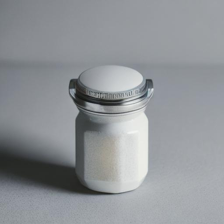

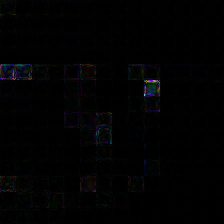

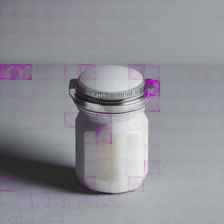

In [13]:
analyse_image("2980_saltshaker.jpg")

logits:  tensor([[-2.7467,  1.9432]], grad_fn=<AddmmBackward0>)
Predicted class: positive


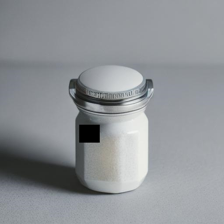

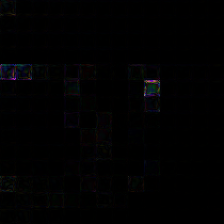

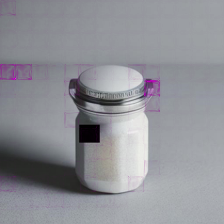

In [14]:
analyse_image("2980_saltshaker_edit.jpg")

logits:  tensor([[-3.7053,  3.4555]], grad_fn=<AddmmBackward0>)
Predicted class: positive


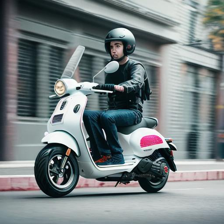

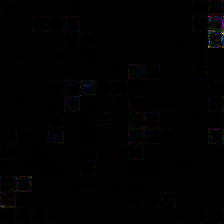

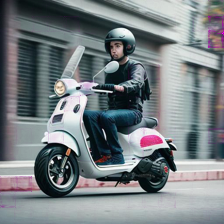

In [15]:
analyse_image("36_motor scooter.jpg")

logits:  tensor([[-2.9758,  2.1334]], grad_fn=<AddmmBackward0>)
Predicted class: positive


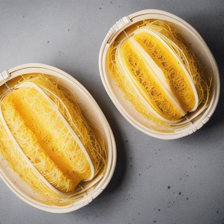

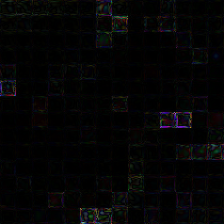

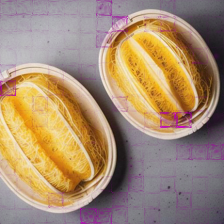

In [16]:
analyse_image("37_spaghetti squash.jpg")

logits:  tensor([[-4.3896,  4.1138]], grad_fn=<AddmmBackward0>)
Predicted class: positive


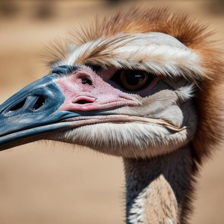

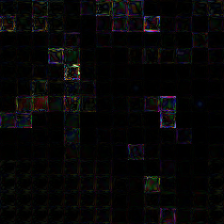

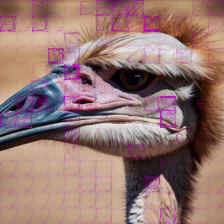

In [17]:
analyse_image("38_ostrich.jpg")

logits:  tensor([[-2.1484,  1.2912]], grad_fn=<AddmmBackward0>)
Predicted class: positive


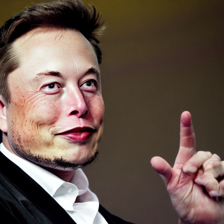

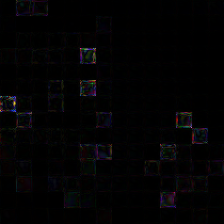

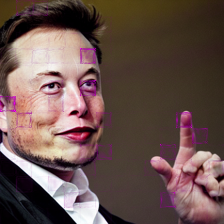

In [18]:
analyse_image("elon2.png")

logits:  tensor([[ 3.0119, -4.4231]], grad_fn=<AddmmBackward0>)
Predicted class: negative


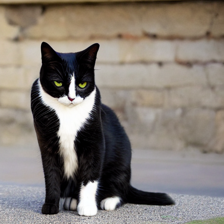

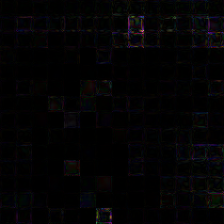

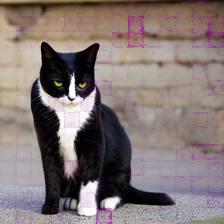

In [19]:
analyse_image("french_cat.png")

In [20]:
from datasets import load_dataset, load_from_disk, interleave_datasets
ds = load_from_disk("../../data/diffusion_and_real/")

In [21]:
ds["test"]

Dataset({
    features: ['image', 'label'],
    num_rows: 1000
})

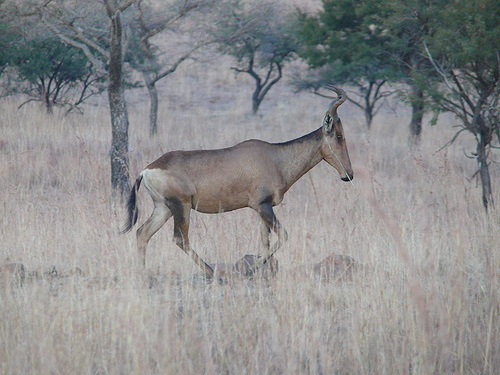

In [22]:
ds["test"][0]["image"]

logits:  tensor([[ 2.4607, -3.6615]], grad_fn=<AddmmBackward0>)
Predicted class: negative


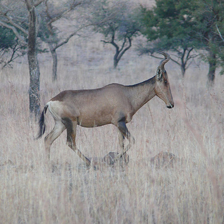

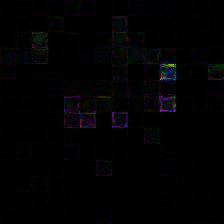

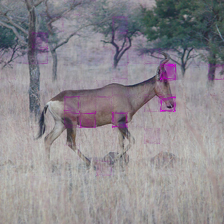

In [23]:
analyse_image(img=ds["test"][0]["image"])

logits:  tensor([[-4.2075,  3.8305]], grad_fn=<AddmmBackward0>)
Predicted class: positive


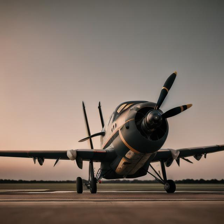

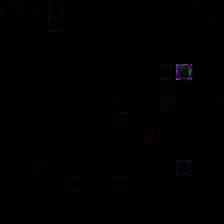

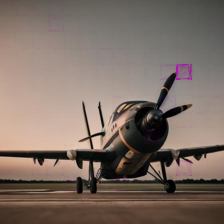

In [24]:
analyse_image("aircraft.jpg")

logits:  tensor([[-4.1941,  3.8181]], grad_fn=<AddmmBackward0>)
Predicted class: positive


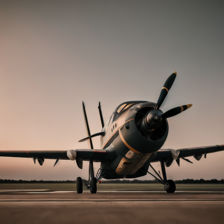

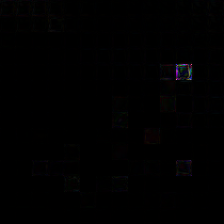

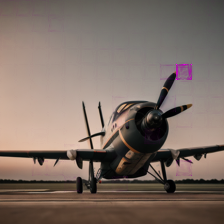

In [25]:
analyse_image("aircraft.png")

logits:  tensor([[ 3.9231, -5.2084]], grad_fn=<AddmmBackward0>)
Predicted class: negative


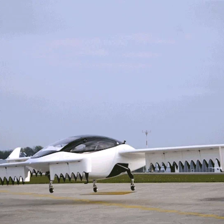

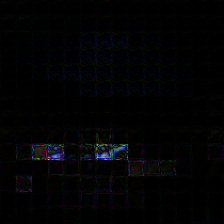

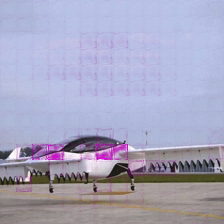

In [26]:
analyse_image("real_aircraft.png")

logits:  tensor([[ 2.2674, -3.6291]], grad_fn=<AddmmBackward0>)
Predicted class: negative


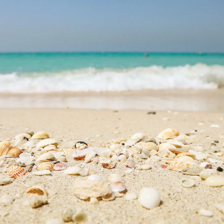

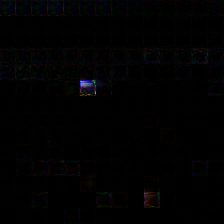

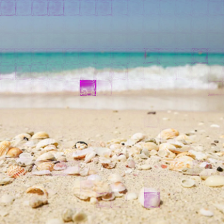

In [27]:
analyse_image("real_beach.png")

true_label 0
logits:  tensor([[ 2.5991, -3.9264]], grad_fn=<AddmmBackward0>)
Predicted class: negative


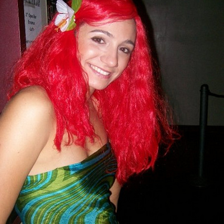

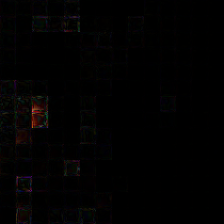

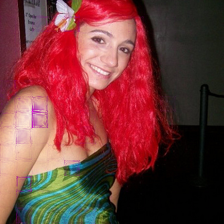

In [28]:
index = 13
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tensor([[-1.8377,  1.0752]], grad_fn=<AddmmBackward0>)
Predicted class: positive


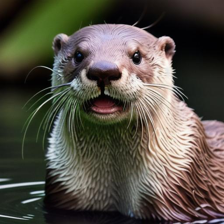

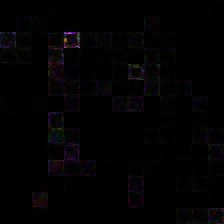

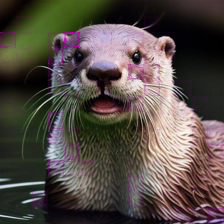

In [29]:
index = 4
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tensor([[ 3.1281, -4.3883]], grad_fn=<AddmmBackward0>)
Predicted class: negative


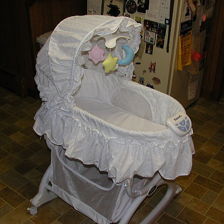

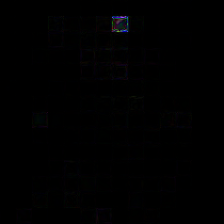

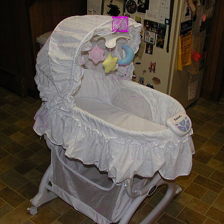

In [30]:
index = 22
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tensor([[ 4.0864, -5.3203]], grad_fn=<AddmmBackward0>)
Predicted class: negative


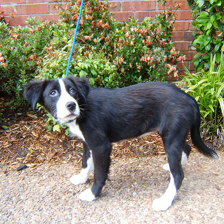

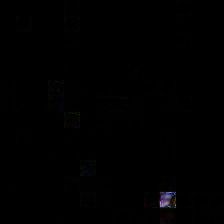

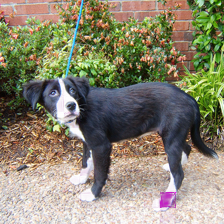

In [31]:
index = 43
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])